# Q-Learning - Frozen Lake

In [6]:
import numpy as np
import random
import time
from IPython.display import clear_output
from matplotlib import pyplot as plot
import numpy as np
import gymnasium as gym


Create game environment for frozen lake.

In [7]:
env = gym.make("FrozenLake-v1", map_name="4x4",  render_mode="ansi") # "human" , "rgb_array"
observation, info = env.reset()



Render the environment:

In [8]:
env.render()


'\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n'

Get states and actions for the lake.

In [9]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

print(action_space_size,state_space_size)

4 16


Move the agent: 

In [10]:
state = env.reset()
action = env.action_space.sample()
#new_state, reward, done, info = env.step(action)
observation, reward, terminated, truncated, info = env.step(action)

clear_output(wait=True)
print(env.render())

  (Up)
SFFF
FHFH
FFFH
HFFG



# Complete the code

Initialize some parameters.

In [11]:
num_episodes = 2000
max_steps_per_episode = 100

learning_rate = 0.2
discount_rate = 0.95

rewards_avg = []

q_table = np.zeros((env.observation_space.n, env.action_space.n))

rewards_all_episodes = []

# Exploration-exploitation trade-off parameters
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.005

print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Run Q-Learning algorithm:

In [12]:
# This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that
# shows how the agent learn how to maximize the reward.
for it in range(200):
    print('average ', it)
    rewards_all_episodes=[]
    
    # exporation-exploitation trade-off params
    exploration_rate = 1
    max_exploration_rate = 1
    min_exploration_rate = 0.01
    exploration_decay_rate = 0.005
    
    #q_table = #your code here
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    # iterate over the episodes
    for episode in range(num_episodes):
        reset_state = env.reset()
        state =reset_state[0]
        done = False
        rewards_current_episode = 0
        
        # iterate over the steps for an episode
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = np.random.rand()
            if exploration_rate_threshold <= exploration_rate:
                action  = env.action_space.sample() 
            else:
                action  = np.argmax(q_table[state, :])
                
            # Take action
            new_state, reward, done, truncated, info = env.step(action)

            # Update Q-table for Q(s,a)
            q_table[state, action] = (1-learning_rate)*q_table[state, action] + learning_rate*(reward+(discount_rate*np.max(q_table[new_state])))
            # transition next state
            state = new_state
            rewards_current_episode += reward

            if done: 
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

        rewards_all_episodes.append(rewards_current_episode)
    rewards_avg.append(rewards_all_episodes)

average  0
average  1
average  2
average  3
average  4
average  5
average  6
average  7
average  8
average  9
average  10
average  11
average  12
average  13
average  14
average  15
average  16
average  17
average  18
average  19
average  20
average  21
average  22
average  23
average  24
average  25
average  26
average  27
average  28
average  29
average  30
average  31
average  32
average  33
average  34
average  35
average  36
average  37
average  38
average  39
average  40
average  41
average  42
average  43
average  44
average  45
average  46
average  47
average  48
average  49
average  50
average  51
average  52
average  53
average  54
average  55
average  56
average  57
average  58
average  59
average  60
average  61
average  62
average  63
average  64
average  65
average  66
average  67
average  68
average  69
average  70
average  71
average  72
average  73
average  74
average  75
average  76
average  77
average  78
average  79
average  80
average  81
average  82
average  83
av

In [13]:
#q_table
print( len(rewards_avg) ) 
print( rewards_avg[0] )

200
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

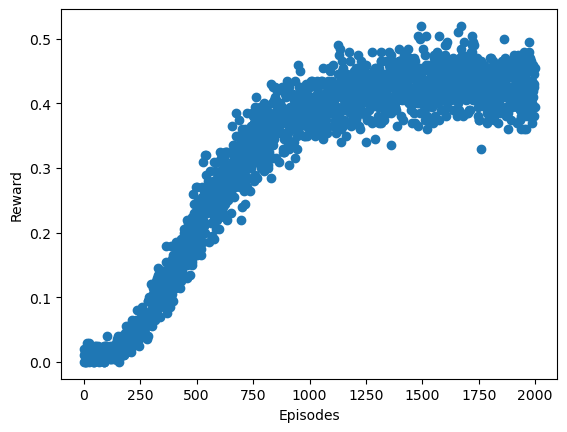

In [14]:

x = [i for i in range(0,num_episodes)]
y = np.mean(rewards_avg, axis=0)
plot.xlabel('Episodes')
plot.ylabel('Reward')
plot.plot(x, y,'o')


In [15]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.12373488 0.11237158 0.11110129 0.11077224]
 [0.09667211 0.04483223 0.08379421 0.08775827]
 [0.08013129 0.07945723 0.07639323 0.06805492]
 [0.01285891 0.04199721 0.00298225 0.        ]
 [0.14527898 0.12919103 0.12851345 0.11415681]
 [0.         0.         0.         0.        ]
 [0.12869042 0.04157485 0.04352818 0.03895685]
 [0.         0.         0.         0.        ]
 [0.10170818 0.19387893 0.13443705 0.23433927]
 [0.17534249 0.37825917 0.19211604 0.10008448]
 [0.48647595 0.17023419 0.117554   0.13136723]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.26078501 0.19947137 0.52442745 0.24542498]
 [0.46063487 0.86318591 0.50337962 0.42231222]
 [0.         0.         0.         0.        ]]


0: Move left

1: Move down

2: Move right

3: Move up

watch it play!

In [16]:
for episode in range(10):
    reset_state = env.reset()
    state =reset_state[0]
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, truncated, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        state = new_state
        env.close()

****You reached the goal!****


In [17]:

# Obtener la política óptima (matriz de valores Q)
optimal_policy = np.argmax(q_table, axis=1)

# Definir el tamaño del mapa
map_size = (4, 4)

# Crear una matriz para representar el mapa con la política óptima
map_with_policy = np.zeros(map_size)

for state, action in enumerate(optimal_policy):
    row = state // map_size[1]
    col = state % map_size[1]
    map_with_policy[row, col] = action
    print(action)

0
0
0
1
0
0
0
0
3
1
0
0
0
2
1
0


# Answer these questions

Answer the following questions running the necessary experiments if necessary:
- What the env.step(action) does? 

    It is used to execute a specific action in the environment and observe the resulting state, reward, done state and other information.
- How is the agent rewarded? why?
    the agent is rewarded when it reaches the goal , and not rewarded when it falls
    
- What is the q_table matrix for? 

     It represents the expected rewards for each state-action combination in the environment, the agent uses the q-table to make decisions by selecting the action with the highest expected reward for a given state
     
- What is an optimal policy for this specific problem? (needs experiments)

   image is in code block below
   
   
- What happen if we modify the exploration_decay_rate parameter? what does it do? (needs experiments)


. . . 


- What is the discount_rate and learning_rate for? what happen if we modify those? (needs experiments)


discount_rate  controls the trade-off between immediate rewards and long-term rewards. A discount rate of 0 means the agent only cares about immediate rewards, while a discount rate of 1 means the agent considers future rewards with equal importance to immediate rewards.


learning_rate controls the extent to which the agent updates the Q-values based on new information. It determines how much weight is given to the newly observed reward when updating the Q-value. A learning rate of 0 means the Q-values are not updated, and the agent doesn't learn from new experiences, while a learning rate of 1 means the agent completely replaces the old Q-value with the new one. I

- What happen if we remove the first cycle in the code: for i in range(100)? what is their purpose? 


 This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that, if we take it out or reduce the number we wont be able to plot the rewards or will have a less-smooth plot
 

- What is the is_slippery property does? What if we remove the slippery property (is_slippery=False) in the environment? Do we still need RL to solve this problem? why?

The lake is slippery (unless is_slippery is disabled) so the player may move perpendicular to the intended direction sometimes 


- Can you explain in your own words what the last block of code does?
    
    The code starts a loop that runs for a specific number of episodes (in this case, 10).
In each episode, the environment is reset using env.reset() to initialize the starting state.
we can see in each episode how the agent interacts with the environment using the learned Q-table, observes the environment's states and rewards, and visually displays the agent's progress throughout the episode. Finally we can see if the agent reached the goal, or fell

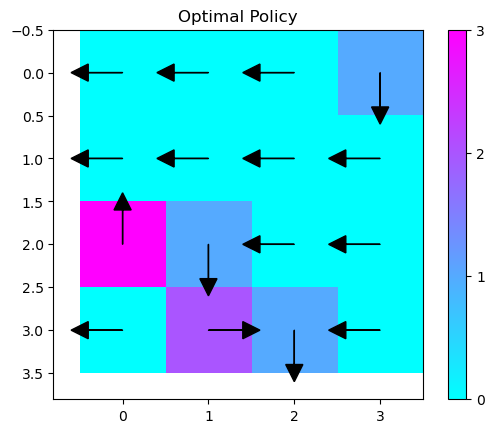

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la política óptima (matriz de valores Q)
optimal_policy = np.argmax(q_table, axis=1)

# Definir el tamaño del mapa
map_size = (4, 4)

# Crear una matriz para representar el mapa con la política óptima
map_with_policy = np.zeros(map_size, dtype=int)

# Asignar la acción correspondiente a cada estado en el mapa
for state, action in enumerate(optimal_policy):
    row = state // map_size[1]
    col = state % map_size[1]
    map_with_policy[row, col] = action

# Crear el gráfico del mapa con la política óptima
plt.imshow(map_with_policy, cmap='cool')
plt.colorbar(ticks=[0, 1, 2, 3])
plt.title('Optimal Policy')

# Agregar las flechas en las celdas correspondientes
for i in range(map_size[0]):
    for j in range(map_size[1]):
        action = map_with_policy[i, j]
        if action == 0:
            plt.arrow(j, i, -0.4, 0, head_width=0.2, head_length=0.2, fc='k', ec='k')
        elif action == 1:
            plt.arrow(j, i, 0, 0.4, head_width=0.2, head_length=0.2, fc='k', ec='k')
        elif action == 2:
            plt.arrow(j, i, 0.4, 0, head_width=0.2, head_length=0.2, fc='k', ec='k')
        elif action == 3:
            plt.arrow(j, i, 0, -0.4, head_width=0.2, head_length=0.2, fc='k', ec='k')

plt.show()
